In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

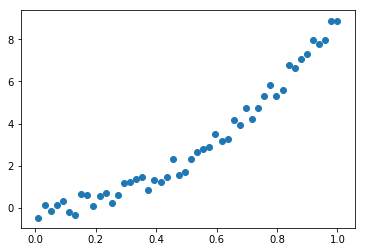

In [2]:
n = 50
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 3, n) * np.linspace(0.01, 3, n) + np.random.rand(n) - .5


plt.scatter(x,y)

## Linear Regression - no regularization

In [3]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([ 9.08616364]), -1.5368905747964625)

## Linear "Ridge" Regression - L2 regularization

In [11]:
ridge = linear_model.Ridge(alpha=.5)

ridge.fit(x, y)

ridge.coef_, ridge.intercept_

(array([ 8.12981268]), -1.0539333382416531)

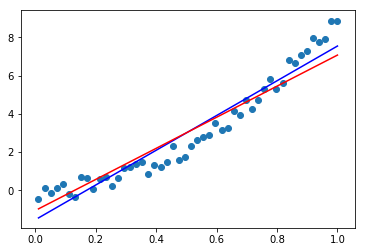

In [12]:
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')
plt.plot(x, x*ridge.coef_ + ridge.intercept_, c='r')

Clearly Linear 1 degree (y = m x) don't fix very well

## Let's try $x^{15}$ polynomial!

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)

x_15 = poly.fit_transform(x.reshape(-1, 1))

In [15]:
linear = linear_model.LinearRegression()

linear.fit(x_15, y)

(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -3.38738776e+00,   2.37363986e+03,
         -8.73366914e+04,   1.46534344e+06,  -1.42471644e+07,
          8.90970686e+07,  -3.79303372e+08,   1.13585168e+09,
         -2.43411238e+09,   3.75008288e+09,  -4.11951715e+09,
          3.14802873e+09,  -1.58990821e+09,   4.77020556e+08,
         -6.43730180e+07]), -0.56102272764814831)

In [16]:
ridge = linear_model.Ridge()

ridge.fit(x_15, y)

(ridge.coef_, ridge.intercept_)

(array([ 0.        ,  2.46584662,  2.19617178,  1.69474406,  1.2512304 ,
         0.89844573,  0.62499553,  0.41385576,  0.25019329,  0.12247432,
         0.02205114, -0.05749234, -0.12091931, -0.17178689, -0.21277444,
        -0.24591995]), 0.073229829751426223)

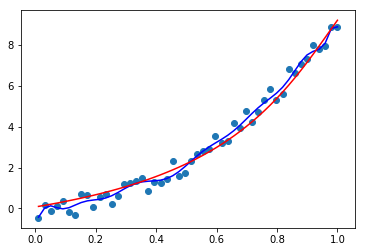

In [17]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

We can see that the non-ridge model fits points very well. But how does it fare for new points?

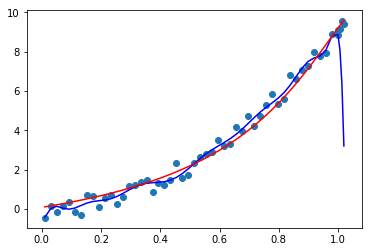

In [18]:
m = 4 # 4 new points
x_final = 1.02 # going through to x = 1.02
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

Clearly, the new predictions are not so great.

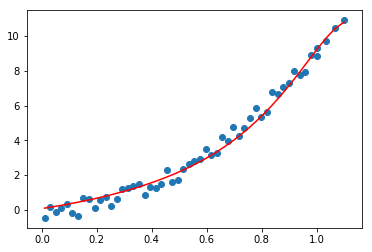

In [19]:
m = 4 
x_final = 1.1 
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

The Ridge model fares better for new values. 

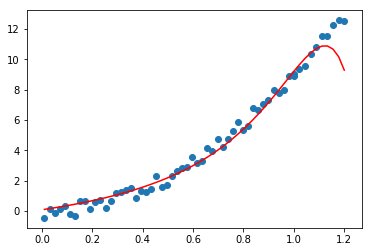

In [20]:
m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

But not all new values

## Back to $x^2$ degree model 

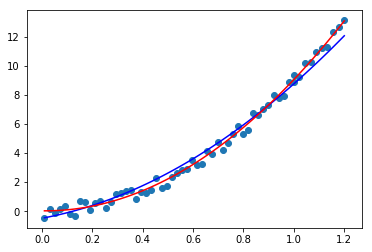

In [21]:
poly2 = PolynomialFeatures(degree=2)

m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_poly = poly2.fit_transform(x2)

y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


ridge = linear_model.Ridge()
ridge.fit(x_poly, y2)

model = linear_model.LinearRegression()
model.fit(x_poly, y2)

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_poly, ridge.coef_) + ridge.intercept_, c='b')
plt.plot(x2, np.dot(x_poly, model.coef_) + model.intercept_, c='r')